<a href="https://colab.research.google.com/github/rrajkumar77/Industry-Grade-Data-Science/blob/main/chirag_k_mean_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
Univ = pd.read_csv("Universities.csv")

NameError: name 'pd' is not defined

In [ ]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Univ_df = scaler.fit_transform(Univ.iloc[:,1:])

In [ ]:
scaled_Univ_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

# How to find optimum number of  cluster
### #The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:


In [ ]:
range(1,4)

range(1, 4)

In [ ]:
for i in range(1,4):
  print(i)

1
2
3


In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)
    if i > 2:
      break

Random state : random_state is a parameter used in the KMeans function from scikit-learn. It controls the randomness of the algorithm during the initialization of centroids (cluster centers).

In [ ]:
wcss

[149.99999999999997, 64.1452839501027, 49.69054164653248]

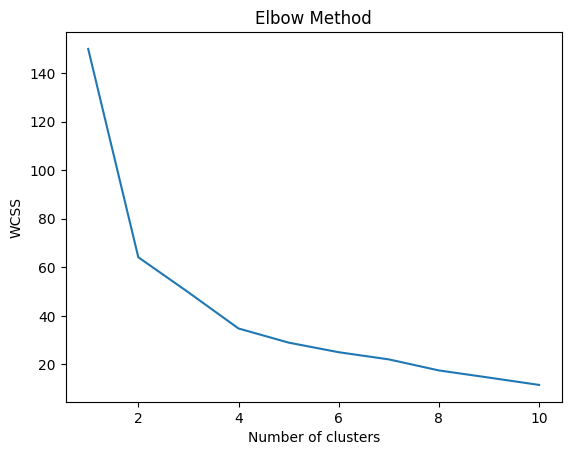

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Univ_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Univ_df)

KMeans(n_clusters=4, random_state=42)

In [ ]:
clusters_new.labels_

array([2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 1, 2,
       2, 1, 2], dtype=int32)

In [ ]:
#Assign clusters to the data set
Univ['clusterid_new'] = clusters_new.labels_

In [ ]:
#these are standardized values.
clusters_new.cluster_centers_

array([[ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ],
       [-1.35856999, -1.56922385,  1.49000956,  0.67249284, -0.92455897,
        -1.27552555],
       [ 0.4019729 ,  0.47834204, -0.4942352 , -0.19543032,  0.06879803,
         0.5419194 ],
       [-1.8031381 , -1.44318177,  1.43827311,  3.08142243, -1.32197103,
        -2.22202861]])

In [ ]:
Univ.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2


In [ ]:
Univ[Univ['clusterid_new']==3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
17,TexasA&M,1075,49,67,25,8704,67,3


In [ ]:
Univ[Univ['clusterid_new']==0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
1,CalTech,1415,100,25,6,63575,81,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
